<a id='top'></a>
# Table of contents

[Importing libraries, settings, and data](#import)

[Data preparation for regression analysis](#prep)

[Regression analysis](#regression)

[Bonus](#bonus)

- [Comparing how the regression fits the training data](#training)
- [Optimising the model by removing outliers](#outliers)

<a id='import'></a>
# Importing libraries, settings, and data

[Back to top](#top)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

In [3]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data\Data Prepared' #creating a path

#Importing the data

df=pd.read_pickle(os.path.join(path,'merged_data.pkl')) 

<a id='prep'></a>
# Data preparation for regression analysis

[Back to top](#top)

As I determined in exercise 6.2, the strongest correlation in my data can be observed between gdp per capita and rate of undernourished people in a country.

In [4]:
# Choosing the variables that I will test 

df_reg=df[['gdp_pcapita','%_undernourished']]
df_reg.shape

(133848, 2)

In [5]:
df_reg.isnull().sum() #NaN will be dropped 

gdp_pcapita          9915
%_undernourished    38472
dtype: int64

In [6]:
#Dropping missing values

df_reg_final=df_reg.dropna()

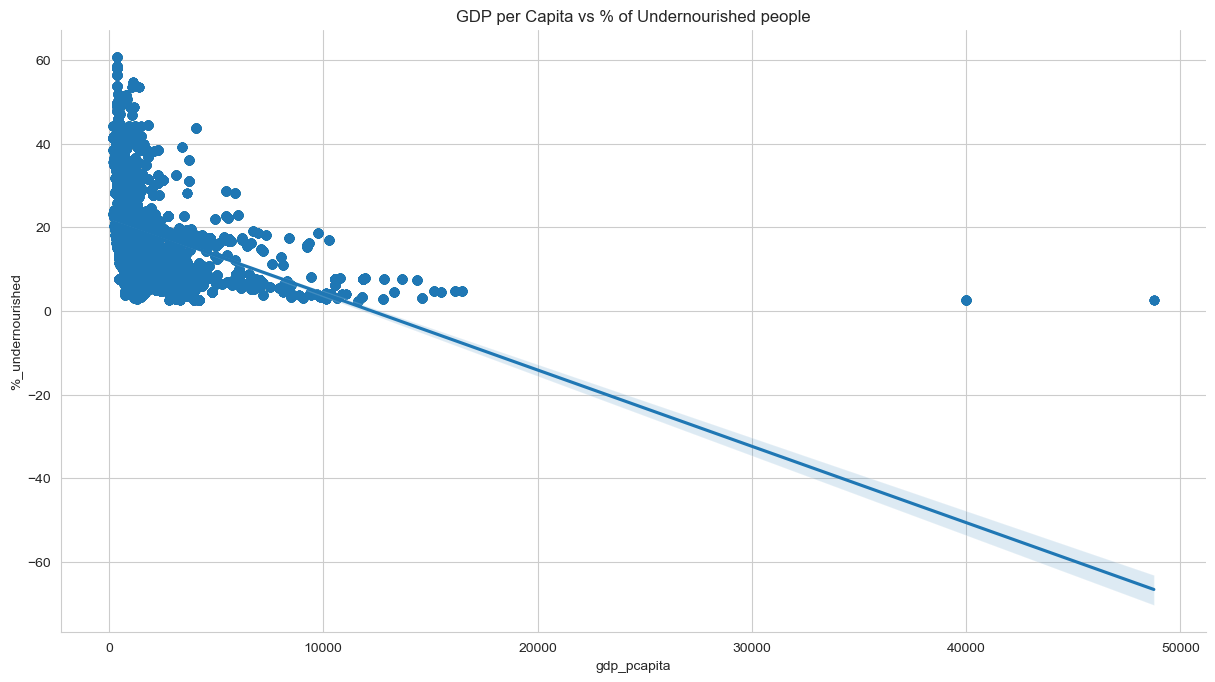

In [7]:
# Creating scatterplot to explore gdp per capita and rate of undernourished people in a country

sns.set_style('whitegrid')
scatter_gdp_undernourished=sns.lmplot(x = 'gdp_pcapita', y = '%_undernourished', data = df_reg_final)
scatter_gdp_undernourished.fig.set_figwidth(14)
scatter_gdp_undernourished.fig.set_figheight(7)
scatter_gdp_undernourished.set(title='GDP per Capita vs % of Undernourished people')

I can already see that the data can't be predicted by a single linear regression. Besides, there are some very high gdp values that will affect the outcome.

In [8]:
# Checking the highest values

df.loc[df['gdp_pcapita']>30000]['country'].value_counts()

# GDP in Japan is indeed much higher than in other countries included in the observation

Japan    574
Name: country, dtype: int64

In [9]:
#Checking basic statistics

mean=df_reg_final['%_undernourished'].mean()
median=df_reg_final['%_undernourished'].median()
max=df_reg_final['%_undernourished'].max()

print(mean,median,max)
                

18.68590845968181 16.424092595279973 60.68865281694552


### Hypothesis: 
If the country's GDP per capita grows, the rate of undernourished people in the population decreases.  

In [10]:
# Reshaping the variables into NumPy arrays

X = df_reg_final['gdp_pcapita'].values.reshape(-1,1)
y = df_reg_final['%_undernourished'].values.reshape(-1,1)

In [11]:
X

array([[ 183.5327752],
       [ 183.5327752],
       [ 183.5327752],
       ...,
       [1773.920411 ],
       [1773.920411 ],
       [1773.920411 ]])

In [12]:
y

array([[44.28517443],
       [44.28517443],
       [44.28517443],
       ...,
       [38.14043734],
       [38.14043734],
       [38.14043734]])

In [13]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a id='regression'></a>
# Regression analysis

[Back to top](#top)

In [14]:
# Creating a regression object

regression = LinearRegression()

In [15]:
# Fiting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicting the values of y using X in the test data

y_predicted = regression.predict(X_test)

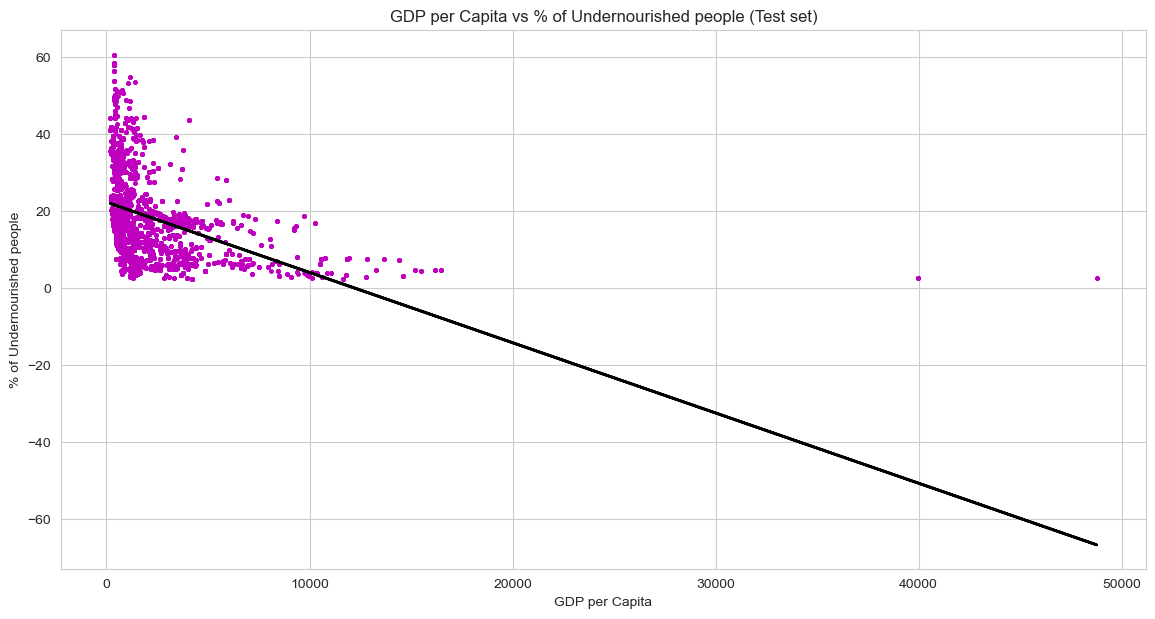

In [17]:
# Creating a scatterplot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='m', s = 5)
plot_test.plot(X_test, y_predicted, color='black', linewidth =2)
plot_test.title('GDP per Capita vs % of Undernourished people (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('% of Undernourished people')
plot_test.show()

I realize that predicting such a complicated socio-economic issue as food security can't be done by looking at a single independent variable. As expected, the line doesn't fit the values. Though the scatterplot does show that countries with low GDP per capita tend to have a higher percentage of undernourished people, I can't confirm my hypothesis using a single linear regression.

In [18]:
# Checking the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score


print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00182552]]
Mean squared error:  113.33697386784885
R2 score:  0.1425099336001483


In [19]:
# Create a dataframe if the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,32.637751,21.060339
1,31.918778,20.996187
2,18.074167,21.889306
3,7.818812,16.853731
4,12.395201,18.139134
5,13.101325,13.340693
6,13.991477,16.412217
7,16.872361,11.052519
8,28.433861,21.819635
9,16.230714,16.967832


I can see that many predicted values don't even come close to the actual values. That fits my expectations that the percentage of undernourished people in a certain country and year can't be predicted by a simple regression model. The data set contains information on a variety of countries that have very diverse social, cultural, and economic circumstances that can't be taken into account by such a model.

The original data I'm using comes from trusted sources, and I trust it to be gathered with the best data quality requirements in mind. However, since different data sets covered various time periods and geographic regions, the merged data is quite inconsistent regarding the number of records for each country and year. This introduces the risk of sample bias, meaning that some countries are represented more than others. 

<a id='bonus'></a>
## Bonus

[Back to top](#top)

<a id='training'></a>
### Comparing how the regression fits the training data

[Back to top](#top)


In [20]:
# Predicting y values from the training data

y_predicted_train = regression.predict(X_train) 

In [21]:
#Checking the statistics

rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

#The difference between R2 values is very small, I'm not overfitting the model

Slope: [[-0.00182552]]
Mean squared error:  112.282417221793
R2 score:  0.14517913326894372


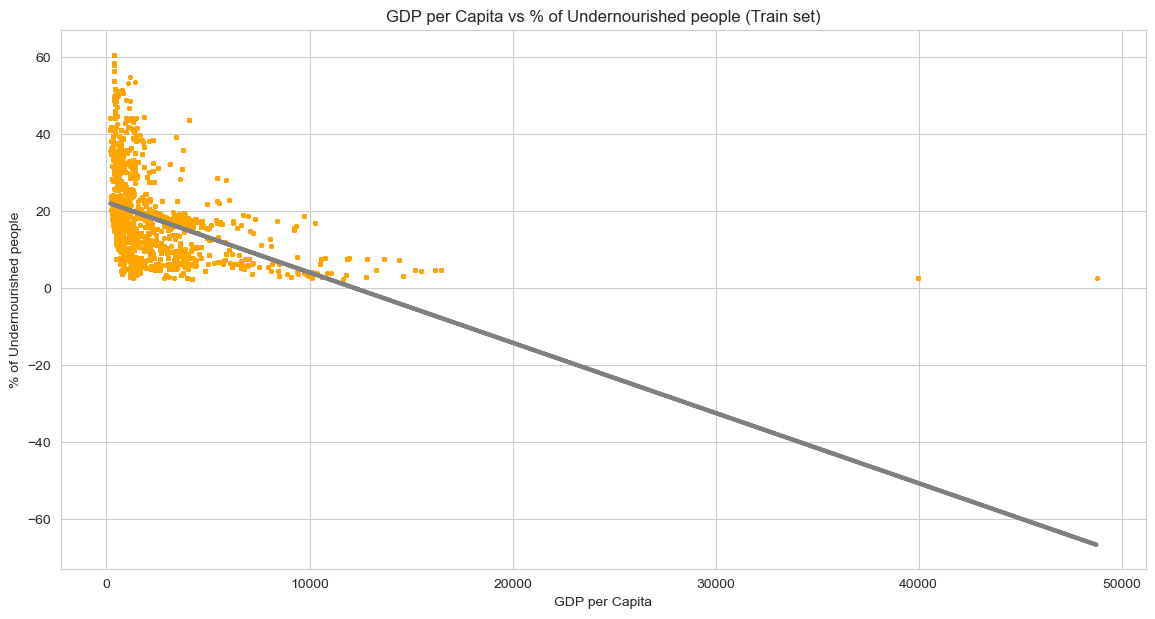

In [22]:
# Visualizing the training set results

plot_train = plt
plot_train.scatter(X_train, y_train, color='orange', s = 5)
plot_train.plot(X_train, y_predicted_train, color='grey', linewidth =3)
plot_train.title('GDP per Capita vs % of Undernourished people (Train set)')
plot_train.xlabel('GDP per Capita')
plot_train.ylabel('% of Undernourished people')
plot_train.show()

<a id='outliers'></a>
### Optimising the model by removing outliers

[Back to top](#top)

In [23]:
# The highest values in GDP per capita are not a result of a mistake or broken data
# But I will remove them to optimize the model

df_reg_final_opt=df_reg_final[df_reg_final['gdp_pcapita']<20000]

# Reshaping the variables into NumPy arrays

X_opt = df_reg_final_opt['gdp_pcapita'].values.reshape(-1,1)
y_opt = df_reg_final_opt['%_undernourished'].values.reshape(-1,1)

# Spliting data into a training set and a test set.

X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y_opt, test_size=0.3, random_state=0)

# Creating a regression object

regression_opt = LinearRegression()

# Fitting data to the regression

regression_opt.fit(X_opt_train, y_opt_train)

LinearRegression()

In [24]:
# Predicting the values of y_opt using X_opt in the test data

y_opt_predicted = regression.predict(X_opt_test)

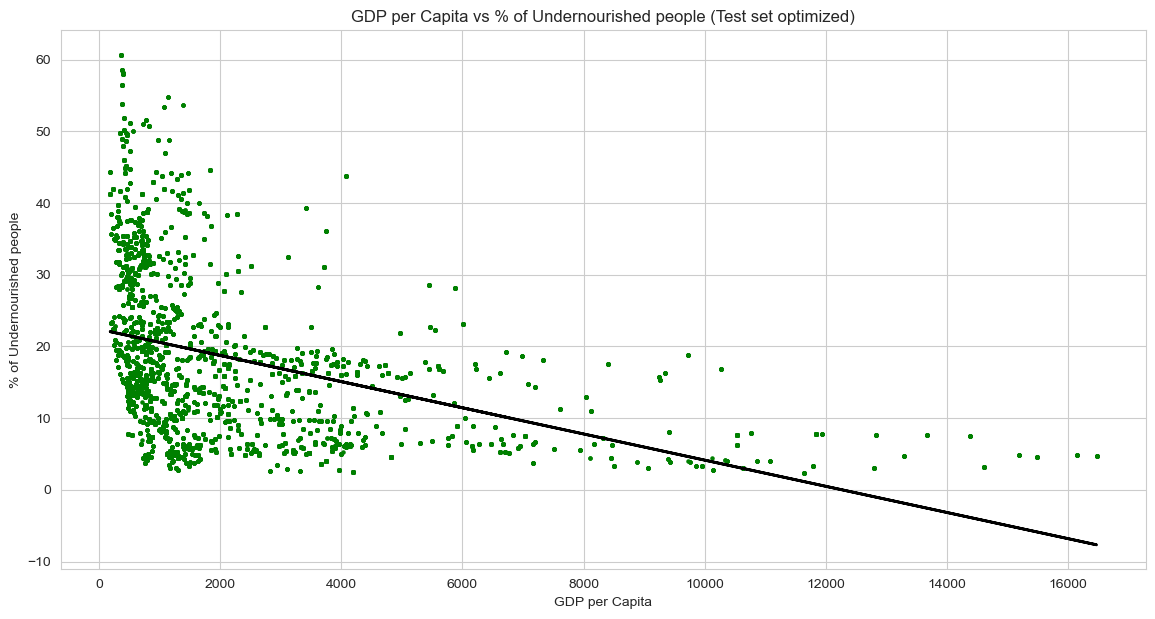

In [25]:
# Visualizing the results

plot_test_opt = plt
plot_test_opt.scatter(X_opt_test, y_opt_test, color='green', s = 5)
plot_test_opt.plot(X_opt_test, y_opt_predicted, color='black', linewidth =2)
plot_test_opt.title('GDP per Capita vs % of Undernourished people (Test set optimized)')
plot_test_opt.xlabel('GDP per Capita')
plot_test_opt.ylabel('% of Undernourished people')
plot_test_opt.show()

In [26]:
#Checking the statistics

rmse_opt = mean_squared_error(y_opt_test, y_opt_predicted)
r2_opt = r2_score(y_opt_test, y_opt_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_opt)
print('R2 score: ', r2_opt)


Slope: [[-0.00182552]]
Mean squared error:  111.45831215375091
R2 score:  0.1592827485848176


The R2 score has increased by about 0.17 after removing outliers, which indicates that the model fits slightly better. However, overall, this model doesn't perform well in this case.